In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#Import data from UCI Machine Learning Depository
raw_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+",
                header=None )

In [3]:
#Investigate Data Set, check first 10 rows,
raw_data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
9,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
#Check for is there any missing value in dataset
raw_data.isnull().sum().sum()

0

In [5]:
#let's check total row and column number
raw_data.shape

(1593, 266)

In [6]:
#As seen from table raw_datas 0-255 raw indicates image (16x16) and 256 to 265 indicates label. Therefore, these values should
#correctly seperated.

X = pd.DataFrame(raw_data) # Firstly, it is listed with pandas.dataframe 
print(X)

      0    1    2    3    4    5    6    7    8    9   ...   256  257  258  \
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 ...     1    0    0   
1     0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...     1    0    0   
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 ...     1    0    0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...     1    0    0   
5     0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
6     0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
7     0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
8     0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
9     0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
10    0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0   
11    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...     1

In [7]:
#Image is seperated from raw data, 256 to 265th columns dropped.
train_img = X.drop([256,257,258,259,260,261,262,263,264,265], axis=1)

In [8]:
#Label is prepared, 256 to 265th columns seperated from raw data
label_st1 = pd.DataFrame(raw_data.iloc[:,[256,257,258,259,260,261,262,263,264,265]])

#Change labels from 256,257.. to 0,1,2
label_st1.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)

#Then create another column to collect label info
label_st1['dig'] = label_st1.apply(lambda x: label_st1.columns[x.argmax()], axis = 1)

#label is assigned to train_lab
train_lab = label_st1['dig']

#check for label is correctly assigned
print(label_st1)

      0  1  2  3  4  5  6  7  8  9  dig
0     1  0  0  0  0  0  0  0  0  0    0
1     1  0  0  0  0  0  0  0  0  0    0
2     1  0  0  0  0  0  0  0  0  0    0
3     1  0  0  0  0  0  0  0  0  0    0
4     1  0  0  0  0  0  0  0  0  0    0
5     1  0  0  0  0  0  0  0  0  0    0
6     1  0  0  0  0  0  0  0  0  0    0
7     1  0  0  0  0  0  0  0  0  0    0
8     1  0  0  0  0  0  0  0  0  0    0
9     1  0  0  0  0  0  0  0  0  0    0
10    1  0  0  0  0  0  0  0  0  0    0
11    1  0  0  0  0  0  0  0  0  0    0
12    1  0  0  0  0  0  0  0  0  0    0
13    1  0  0  0  0  0  0  0  0  0    0
14    1  0  0  0  0  0  0  0  0  0    0
15    1  0  0  0  0  0  0  0  0  0    0
16    1  0  0  0  0  0  0  0  0  0    0
17    1  0  0  0  0  0  0  0  0  0    0
18    1  0  0  0  0  0  0  0  0  0    0
19    1  0  0  0  0  0  0  0  0  0    0
20    0  1  0  0  0  0  0  0  0  0    1
21    0  1  0  0  0  0  0  0  0  0    1
22    0  1  0  0  0  0  0  0  0  0    1
23    0  1  0  0  0  0  0  0  0  0    1


In [9]:
#Then check for size for Image
train_img.shape # It is 1593 rows and 256 columns as desired.

(1593, 256)

In [10]:
#Then check for sizes for Label 
train_lab.shape # It is 1593 rows as expected

(1593,)

In [11]:
print(train_lab)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1563    9
1564    9
1565    9
1566    9
1567    9
1568    9
1569    9
1570    9
1571    9
1572    9
1573    9
1574    9
1575    9
1576    9
1577    9
1578    9
1579    9
1580    9
1581    9
1582    9
1583    9
1584    9
1585    9
1586    9
1587    9
1588    9
1589    9
1590    9
1591    9
1592    9
Name: dig, Length: 1593, dtype: int64


In [12]:
#Check for some visualizations from dataset
def samp_i(train_img, z):
  
    for i in range(z):
        pic = train_img.sample(n=z)
        img = pic.iloc[i].as_matrix()
        img = img.reshape((16, 16))
        plt.figure(figsize = (20,2))
        plt.imshow(img,cmap=plt.cm.gray_r)
        plt.show()

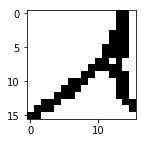

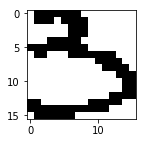

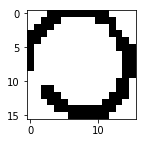

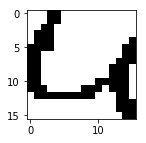

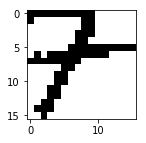

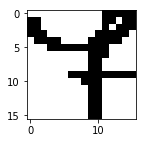

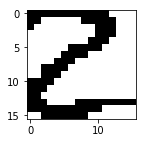

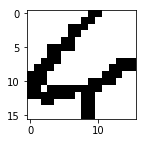

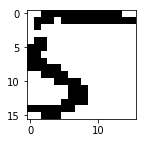

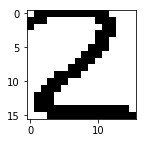

In [13]:
img_number = 10 # Choose how many sample would like to see
samp_i(train_img,img_number)

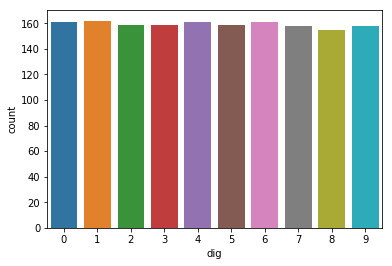

In [14]:
#To check total number distribution
import seaborn as sns
sns.countplot(train_lab)

In [113]:
#trained images and trained labels are split into training and testing sets. The ratio is choosed in 90% training 10% testing
IMG_train, IMG_test, LABEL_train, LABEL_test = train_test_split(train_img,train_lab, test_size=0.1,random_state = 67)

In [114]:
#Kernel choosed "linear"
clf_lin = svm.SVC(kernel='linear')
clf_lin = clf_lin.fit(IMG_train, LABEL_train)

In [115]:
print(clf_lin.score(IMG_test, LABEL_test))

0.95625


In [116]:
#Kernel choosed "rbf"
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf = clf_rbf.fit(IMG_train, LABEL_train)

In [117]:
print(clf_rbf.score(IMG_test, LABEL_test))

0.925


In [118]:
#Kernel choosed "poly" with degree = 2
clf_poly = svm.SVC(kernel='poly', degree=2)
clf_poly = clf_poly.fit(IMG_train, LABEL_train)

In [119]:
print(clf_poly.score(IMG_test, LABEL_test))

0.86875


In [120]:
#Kernel choosed "sigmoid"
clf_sigmoid = svm.SVC(kernel='sigmoid', degree=2)
clf_sigmoid = clf_sigmoid.fit(IMG_train, LABEL_train)

In [121]:
print(clf_sigmoid.score(IMG_test, LABEL_test))

0.9125


In [190]:
#Check for n components which explain the most variance within the data 
#(larger eigenvalue means the feature explains more variance).

arry = np.linspace(0.50, 0.95, num=30)
accuracy = []
for n in arry:
    start = time.time()
    pca = PCA(n_components=n)
    print("PCA n components: {}".format(n));
    pca.fit(IMG_train)
    IMG_train_pca = pca.transform(IMG_train)
    IMG_test_pca = pca.transform(IMG_test)
    print('SVM with Linear Kernel')
    clf1 = svm.SVC(kernel='linear')
    clf1.fit(IMG_train_pca, LABEL_train)
    tim = clf1.score(IMG_test_pca, LABEL_test)
    accuracy.append(tim)
    end = time.time()
    print("accuracy: {}".format(tim));

PCA n components: 0.5
SVM with Linear Kernel
accuracy: 0.9
PCA n components: 0.5155172413793103
SVM with Linear Kernel
accuracy: 0.9
PCA n components: 0.5310344827586206
SVM with Linear Kernel
accuracy: 0.89375
PCA n components: 0.5465517241379311
SVM with Linear Kernel
accuracy: 0.90625
PCA n components: 0.5620689655172414
SVM with Linear Kernel
accuracy: 0.925
PCA n components: 0.5775862068965517
SVM with Linear Kernel
accuracy: 0.93125
PCA n components: 0.593103448275862
SVM with Linear Kernel
accuracy: 0.93125
PCA n components: 0.6086206896551724
SVM with Linear Kernel
accuracy: 0.94375
PCA n components: 0.6241379310344828
SVM with Linear Kernel
accuracy: 0.9375
PCA n components: 0.6396551724137931
SVM with Linear Kernel
accuracy: 0.89375
PCA n components: 0.6551724137931034
SVM with Linear Kernel
accuracy: 0.925
PCA n components: 0.6706896551724137
SVM with Linear Kernel
accuracy: 0.925
PCA n components: 0.6862068965517241
SVM with Linear Kernel
accuracy: 0.9375
PCA n components: 

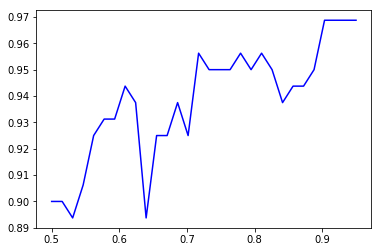

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(arry, np.array(accuracy), 'b-')

In [192]:
pca = PCA(n_components=0.95)
pca.fit(IMG_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [193]:
IMG_train_pca = pca.transform(IMG_train)
IMG_test_pca = pca.transform(IMG_test)

In [194]:
print(IMG_train_pca.shape)
print(IMG_test_pca.shape)

(1433, 159)
(160, 159)


In [196]:
clf_pca = svm.SVC(kernel='linear')
clf_pca.fit(IMG_train_pca, LABEL_train)
clf_pca.score(IMG_test_pca, LABEL_test)

0.96875

In [197]:
Predicted = clf_pca.predict(IMG_test_pca)
conf = confusion_matrix(LABEL_test, Predicted)
print(conf)

[[17  0  0  0  0  0  0  0  1  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  0  1]
 [ 0  1  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0 13  0]
 [ 0  0  1  0  0  0  0  0  0 11]]


Text(69,0.5,'Actual')

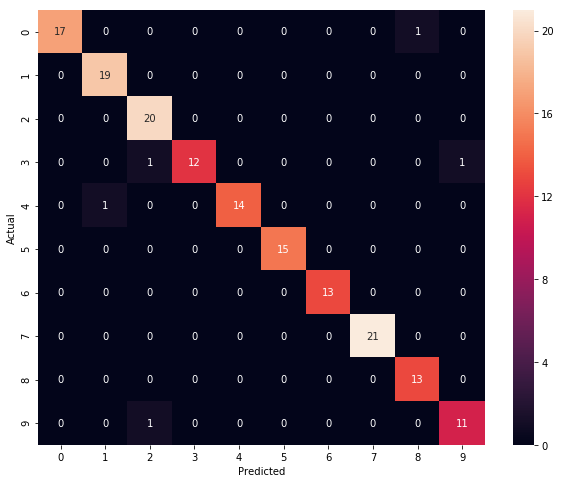

In [202]:
labels = [0,1,2,3,4,5,6,7,8,9]
heat_conf = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,8))

sns.heatmap(heat_conf, annot=True)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)

In [203]:
prf = precision_recall_fscore_support(LABEL_test, Predicted, average='weighted')

print('precision:',prf[0])
print('recall:',prf[1])
print('fbeta:',prf[2])

precision: 0.970645292208
recall: 0.96875
fbeta: 0.968565674428


In [204]:
IMG_test.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1380,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
932,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
LABEL_test[:5]

1380    4
881     2
685     4
932     3
1240    1
Name: dig, dtype: int64

In [206]:
LABEL_test_df = LABEL_test.to_frame()
LABEL_test_df.head()

,dig
1380,4
881,2
685,4
932,3
1240,1


In [207]:
LABEL_test_df['IMG_test_pca'] = pd.Series(Predicted, index=LABEL_test_df.index)
LABEL_test_df.head()

,dig,IMG_test_pca
1380,4,4
881,2,2
685,4,4
932,3,3
1240,1,1


In [213]:
#Check for the false predictions
False_predictions = LABEL_test_df.index[LABEL_test_df.dig != LABEL_test_df.IMG_test_pca]
LABEL_test_df.ix[False_predictions]

,dig,IMG_test_pca
1172,9,2
682,4,1
1196,0,8
469,3,2
935,3,9


In [214]:
#Visual observation for false predicted images

def false_image (index_num):
    one_row = X.ix[index_num] # get the record from the X dataset
    one_values = one_row.values # convert the series to a numpy array
        
    i = 16 # values in one array
    j = 0
    img = np.array(one_values[:16])
    while i <= len(one_values):
        temp_array = np.array(one_values[j:i])
        img = np.vstack((img,temp_array))
        j = i   
        i += 16

    # Plot image
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.show()
    
    print (LABEL_test_df.ix[index_num]) 
    return

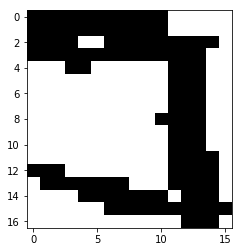

dig             9
IMG_test_pca    2
Name: 1172, dtype: int64


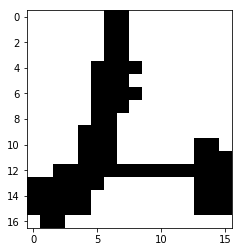

dig             4
IMG_test_pca    1
Name: 682, dtype: int64


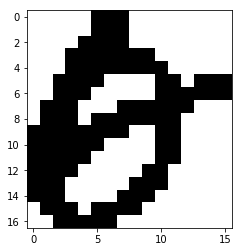

dig             0
IMG_test_pca    8
Name: 1196, dtype: int64


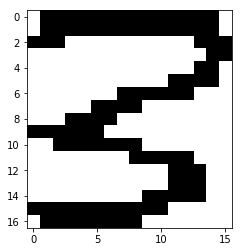

dig             3
IMG_test_pca    2
Name: 469, dtype: int64


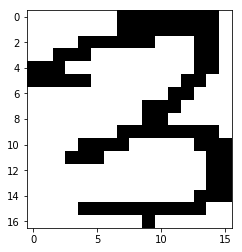

dig             3
IMG_test_pca    9
Name: 935, dtype: int64


In [215]:
l=0
while l <= len(False_predictions)-1:
    false_image (False_predictions[l])
    l+=1